# Python - Exercises
### Day 1 (June 23, 2025)

### Goal 1: Simulate a viral invasion - SV lytic model
Consider the SV model for lytic infections with susceptible cells (S) and free viruses (V) given by,
\begin{align}
\dot{S} &= bS (1- S/K) - \phi SV - dS\\
\dot{V} &= \beta\phi SV - \phi SV - mV
\end{align}

use the following set of parameter values:

- <span class="arithmatex">$ \phi = 6.7 \times 10^{-10} \ \text{mL} \ \text{h}^{-1} $</span>
- m = $$ 1/24 h^{−1} $$
- d =  $1/4 h^{−1}$
- b = $0.95 h^{−1}$
- K = 7.5107 cell $mL^{−1}$
- β = 50 virus/cell

Starting with the SV model, initiate an ‘inoculation’, adding $S0 = 10^4 $cell/mL of microbe, and
then letting the population reach its equilibrium after approximately 24 h.

Question: What population density does it reach? Is it what you expect? Compare your numerical simulation of S at the end of the simulation with the value of the equilibrium that you found analytically. Numerically, create a function describing the SV model and integrate it using python.

In [1]:
# SV model function
def SV_ode(y,t,pars):
    """
    returns the rate of change of host and virus in the standard SV model
    """
    # initialization
    dydt=np.zeros(2)
    S = y[0]
    V = y[1]
    # Parameters
    phi = pars["phi"]
    m = pars["m"]
    d = pars["d"]
    b = pars["b"]
    K = pars["K"]
    beta = pars["beta"]
    # system of ODEs
    dydt[0] = b*S*(1-S/K) - phi*S*V - d*S
    dydt[1] = beta*phi*S*V - phi*S*V - m*V
    return dydt

Text(0.5, 1.0, 'SV numerical integration')

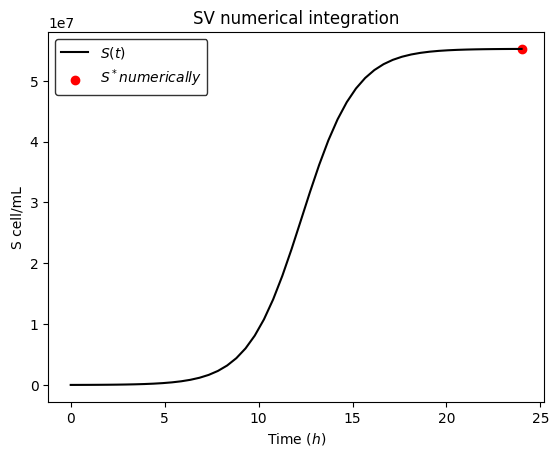

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Numerical time
t0 = 0 # Initial time
tf = 24 # Final time
T = np.linspace(t0,tf) # time steps to report
# Initial population size
y0 = np.zeros(2)
y0[0] = 1E4;
# parameters
pars={}
pars["phi"] = 6.7E-10
pars["m"] = 1/24
pars["d"] = 1/4
pars["b"] = 0.95
pars["K"] = 7.5E7
pars["beta"] = 50

dy = integrate.odeint(SV_ode,y0,T,args=(pars,))
S = dy[:,0]

# Find the equilibrium value numerically:

Seq_num = S[-1]
# plot
plt.plot(T,S,'k', label="$S(t)$")
plt.scatter(T[-1],Seq_num,color='red', label="$S^* numerically$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

Analytically, we find that in absence of virus in the system $(V0 = 0), \dot{V} = 0$ and the system remains disease-free. The SV system reduces to the logistic model with cell death, 
$\dot{S} = bS(1- S/K) - dS$. Solving $\dot{S} = 0$, we find that S approaches the equilibrium point $S^∗ = K(1-d/b)$


Seq =  55263157.89473685


Text(0.5, 1.0, 'SV numerical integration')

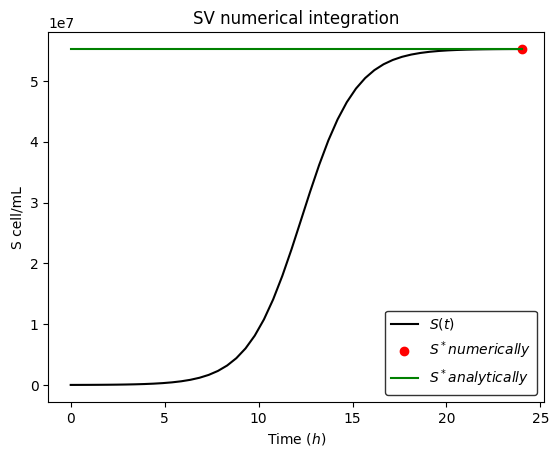

In [4]:
Seq_ana = pars["K"]*(1-pars["d"]/pars["b"])
print("Seq = ", Seq_ana)
# plot and compare
plt.plot(T,S,'k', label="$S(t)$")
plt.scatter(T[-1],Seq_num,color='red', label="$S^* numerically$")
plt.plot(T,np.repeat(Seq_ana,len(T)),color='green', label="$S^* analytically$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")